## Analysis of the Formula 1 V6 Turbo Hybrid Era ( 2014 - 2024)

### Abstract

This project provides a comprehensive data analysis of the Formula 1 V6 Turbo Hybrid era (2014 - 2024) to identify the key factors and trends that defined this transformative decade. Utilizing an archived dataset originally sourced from the Ergast API, the analysis explores driver and constructor performance, the correlation between starting grid position and race outcomes and trends in car reliability. The findings confirmed periods of sustained dominance by **Mercedes** and **Red Bull** exemplified by their star drivers Lewis Hamilton and Max Verstappen respectively. A strong positive correlation was found between a driver's starting grid position and their final race position, suggesting that qualifying performance is a significant predictor of success. A Random Forest Regressor model built to predict a driver's final position achieved a **Mean Absolute Error (MAE) of 3.68** and an **R-squared ($R^2$) score of 0.33**, further validating this correlation. The analysis also revealed a general improvement in car reliability over the decade, with DNFs from engine failures decreasing significantly. The project concludes that while technical prowess and strategic dominance defined the era, the inherent unpredictability of racing and the complexity of hybrid technology also played a crucial role in shaping outcomes.

### Background

The F1 V6 Turbo Hybrid era, which began in 2014, represents one of the most significant technological shifts in the history of the sport. Previously Formula One was known for its naturally aspirated V10 engines and had legendary drivers such as the three time World Champion, Ayrton Senna and the 7 time World Champion, Michael Schumacher. The sport transitioned to the 2.4 liter naturally aspirated V8 engines which had a balance of power and efficiency compared to the preceding V10s. What followed were the 1.6 liter turbo hybrid engines which introduced complex hybrid power units, sophisticated energy recovery systems and new aerodynamic regulations that re-shaped the competitive landscape. This period has been characterized by intense rivalry, periods of sustained dominance by specific teams and an evolution in car reliability and performance. This project aims to analyze these key aspects of the V6 era using publicly available race data.

### Research Problem

This analysis seeks to address the central question of what key factors and trends defined the Formula 1 V6 Turbo Hybrid era, which began in 2014 and has since transformed the sport both technologically and competitively. The project aims to uncover how driver and constructor performances evolved across seasons, identifying dominant patterns, breakthroughs, and shifts in competitiveness. A key area of focus is the impact of starting grid positions on race outcomes, whether pole position consistently led to victory or if strategic variables and mid-race dynamics played more decisive roles. In addition, the analysis explores how car reliability progressed during the era, particularly in light of new engine regulations, energy recovery systems and aerodynamic developments. By combining statistical methods with visual storytelling, this project seeks to construct a data-driven narrative that captures the essence of this transformative decade in Formula 1. Ultimately, the goal is to offer insights not only into past performance but also into how technical and strategic decisions shaped the competitive landscape of modern F1.

### Objectives

This project was guided by the following objectives:
1. To identify and analyze the performance of the dominant drivers and constructors throughout the V6 era.
2. To understand the relationships between key race metrics, such as starting grid position, finishing order, and points scored.
3. To investigate the causes and trends of race retirements (DNFs) and car reliability from 2014 to 2024.

### Data Description

This project utilized data from an archived dataset of Formula One statistics. The raw source for this data was originally the Ergast API, a free and open-source database of F1 statistics. However, it is important to note that the API has since been discontinued and the dataset is no longer actively updated beyond the 2024 season.

The data was collected by downloading four separate CSV files: `constructors.csv`, `drivers.csv`, `races.csv` and `results.csv`. These files were then merged in Python, with `results.csv` serving as the base table, to form a single, comprehensive DataFrame for analysis.

A key condition of this dataset is its scope. While the raw data covers the F1 championship from 1950, our analysis was specifically conditioned to focus on the **V6 Turbo Hybrid era (2014 - 2024)**. The data's granularity is at the race result level, meaning each row represents a driver's final outcome in a specific race and does not include live telemetry or lap-by-lap data.

The following table summarizes the key variables used in our analysis:

| Variable Name      | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `raceYear`         | The year the race took place.                                               |
| `positionOrder`    | The final finishing position of the driver.                                 |
| `points`           | The points awarded to the driver for the race.                              |
| `grid`             | The starting grid position of the driver.                                   |
| `statusId`         | A numerical ID indicating the race status (e.g. Finished, DNF reason).      |
| `constructorName`  | The name of the constructor (team) the driver raced for.                    |
| `driverName`       | The name of the driver.                                                     |
| `laps`             | The total number of laps completed by the driver.                           |
| `fastestLapSpeed`  | The speed of the driver's fastest lap.                                      |

In [1]:
# Importing the pandas library
import pandas as pd
# Loading the csv files into Data Frames
try:
    df_results = pd.read_csv("results.csv")
    df_drivers = pd.read_csv("drivers.csv")
    df_constructors = pd.read_csv("constructors.csv")
    df_races = pd.read_csv("races.csv")
    print ("All CSV files loaded successfully!")
except FileNotFoundError as e:
    print (f"Error loading file {e}. Please ensure all CSV files are in the correct directory")
    exit() 

All CSV files loaded successfully!


In [2]:
print ("\n--- Initial DataFrames Info ---")
print ("df_results shape:", df_results.shape)  
print (df_results.head())

print ("\ndf_drivers shape:", df_drivers.shape)
print (df_drivers.head())

print ("\ndf_constructors shape:", df_constructors.shape)
print (df_constructors.head())

print ("\ndf_races shape:", df_races.shape)
print (df_races.head())


--- Initial DataFrames Info ---
df_results shape: (26759, 18)
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    

## Data Cleaning

The raw data required several steps to be prepared for analysis. Four separate CSV files (`constructors.csv`, `drivers.csv`, `races.csv`, and `results.csv`) were merged into a single DataFrame. The project also handled missing values, converted data types and filtered the combined data to focus exclusively on the F1 V6 Turbo Hybrid era from the 2014 season through the most recent data available in 2024.

### Merging results with drivers

In [3]:
# Adding driver names  (forename, surname) to df_results as both DataFrames share the driverId column.
# Selecting only the columns that I need to merge to prevent bringing unnecessary columns from the right DF.
df_drivers_selected = df_drivers [["driverId", "forename", "surname"]]

# Performing the merge. df_results is the 'left' DataFrame
df_combined = pd.merge(df_results, df_drivers_selected, on = "driverId", how = "left")

# Creating a combined "driverName" column for easier use
df_combined["driverName"] = df_combined["forename"] + " " + df_combined["surname"]

# Droping the individual forename and surname columns now that we have driverName
df_combined.drop(columns=["forename", "surname"], inplace = True)

print("\n--- After Merging with Drivers ---")
print("df_combined shape:", df_combined.shape)
print(df_combined.head())
# Checking if driver names are now visible:
print(df_combined[["driverId", "driverName", "positionText", "points"]].head())


--- After Merging with Drivers ---
df_combined shape: (26759, 19)
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId         driver

### Merging combined DataFrame with constructors

In [4]:
# Selecting necessary columns from df_constructors
df_constructors_selected = df_constructors[["constructorId", "name"]]

# Merging with constructors
# Renaming 'name' columnfrom constructors to 'constructorName' to avoid conflict with 'raceName' later on
df_combined = pd.merge(df_combined, df_constructors_selected, on = "constructorId", how = "left")
# Renaming the 'name' column (from constructors) to something more descriptive
df_combined.rename(columns = {"name": "constructorName"}, inplace = True)

print ("\n--- After Merging with Constructors ---")
print ("df_combined shape:", df_combined.shape)
print (df_combined.head())

# Checking if constructor names are now visible:
print (df_combined [["constructorId", "constructorName", "driverName", "positionText"]].head())


--- After Merging with Constructors ---
df_combined shape: (26759, 20)
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId         d

### Merging the combined DataFrame with Races

In [5]:
# Selecting necessary columns from df_races
df_races_selected = df_races[["raceId", "year", "name", "round", "date"]]

# Merging with the races
df_combined = pd.merge(df_combined, df_races_selected, on = "raceId", how = "left")
# Renaming 'name' from races to 'raceName' and 'year' to 'raceYear'
df_combined.rename(columns = {"name": "raceName", "year": "raceYear"}, inplace = "True")

print ("\n--- After Merging with Races ---")
print ("df_combined shape:", df_combined.shape)
print(df_combined.head())

# Checking if race details are now visible:
print(df_combined [["raceId", "raceYear", "raceName", "driverName", "constructorName", "positionText"]].head())


--- After Merging with Races ---
df_combined shape: (26759, 24)
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  rank fastestLapTime  \
0            1              1    10.0  ...     2       1:27.452   
1            2              2     8.0  ...     3       1:27.739   
2            3              3     6.0  ...     5       1:28.090   
3            4              4     5.0  ...     7       1:28.603   
4            5              5     4.0  ...     1       1:27.418   

  fastestLapSpeed statusId         driverName constructorName raceYear  \
0         218.300        1     Lewis 

### Selecting columns and sampling rows

In [6]:
# Filtering the Race Year to start from 2014 as this was the introduction of the 1.6-ltr turbocharged v6 engines.
df_v6_era = df_combined[df_combined["raceYear"] >= 2014].copy()
print (f"\nDataFrame shape after filtering for V6 era (from 2014): {df_v6_era.shape}")

final_columns = [
    # Identifiers
    "resultId", "raceId", "driverId", "constructorId",
    # Race context
    "raceYear", "raceName", "round", "date",
    # Names
    "driverName", "constructorName",
    # Performance
    "grid", "positionOrder", "points", "laps", "milliseconds", "fastestLap", "fastestLapSpeed", "statusId"
]

# Creating the final DataFrame with the above selected columns
df_f1_v6 = df_v6_era[final_columns].copy()

print(f"\nFinal DataFrame (after year filter and column selection) shape: {df_f1_v6.shape}")
print(f"Final DataFrame (after year filter and column selection) rows: {df_f1_v6.shape[0]}")
print("\n--- Final DataFrame for EDA ---")
print("df_f1_v6 shape:", df_f1_v6.shape)
print(df_f1_v6.info()) # This shows column names, non-null counts, and data types
print(df_f1_v6.head())

# Saving this combined and sampled DataFrame to a new CSV
df_f1_v6.to_csv('f1_eda_data_v6_era.csv', index=False)
print("\nFinal F1 EDA data (V6 Era) saved to 'f1_eda_data_v6_era.csv'")


DataFrame shape after filtering for V6 era (from 2014): (4626, 24)

Final DataFrame (after year filter and column selection) shape: (4626, 18)
Final DataFrame (after year filter and column selection) rows: 4626

--- Final DataFrame for EDA ---
df_f1_v6 shape: (4626, 18)
<class 'pandas.core.frame.DataFrame'>
Index: 4626 entries, 22127 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         4626 non-null   int64  
 1   raceId           4626 non-null   int64  
 2   driverId         4626 non-null   int64  
 3   constructorId    4626 non-null   int64  
 4   raceYear         4626 non-null   int64  
 5   raceName         4626 non-null   object 
 6   round            4626 non-null   int64  
 7   date             4626 non-null   object 
 8   driverName       4626 non-null   object 
 9   constructorName  4626 non-null   object 
 10  grid             4626 non-null   int64  
 11  positionOrder    4

In [7]:
# Loading the new csv file
import pandas as pd
df_f1_v6 = pd.read_csv('f1_eda_data_v6_era.csv')
print(df_f1_v6.info())
print(df_f1_v6.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         4626 non-null   int64  
 1   raceId           4626 non-null   int64  
 2   driverId         4626 non-null   int64  
 3   constructorId    4626 non-null   int64  
 4   raceYear         4626 non-null   int64  
 5   raceName         4626 non-null   object 
 6   round            4626 non-null   int64  
 7   date             4626 non-null   object 
 8   driverName       4626 non-null   object 
 9   constructorName  4626 non-null   object 
 10  grid             4626 non-null   int64  
 11  positionOrder    4626 non-null   int64  
 12  points           4626 non-null   float64
 13  laps             4626 non-null   int64  
 14  milliseconds     4626 non-null   object 
 15  fastestLap       4626 non-null   object 
 16  fastestLapSpeed  4626 non-null   object 
 17  statusId      

#### Data type conversion

In [8]:
# Converting 'milliseconds' to numeric
df_f1_v6["milliseconds"] = pd.to_numeric(df_f1_v6["milliseconds"], errors = "coerce")
print("\n--- 'milliseconds' column after conversion ---")
print(df_f1_v6["milliseconds"].head())
print(f"Number of NaN values in 'milliseconds': {df_f1_v6['milliseconds'].isnull().sum()}")

# Converting 'fastestLap' to numeric
df_f1_v6["fastestLap"] = pd.to_numeric(df_f1_v6["fastestLap"], errors = "coerce")
print("\n--- 'fastestLap' column after conversion ---")
print(df_f1_v6["fastestLap"].head())
print(f"Number of NaN values in 'fastestLap': {df_f1_v6['fastestLap'].isnull().sum()}")

# Converting 'fastestLapSpeed' to numeric
df_f1_v6["fastestLapSpeed"] = pd.to_numeric(df_f1_v6["fastestLapSpeed"], errors = "coerce")
print("\n--- 'fastestLapSpeed' column after conversion---")
print(df_f1_v6["fastestLapSpeed"].head())
print(f"Number of NaN values in 'fastestLapSpeed': {df_f1_v6['fastestLapSpeed'].isnull().sum()}")

# Converting 'date' to datetime objects
df_f1_v6["date"] = pd.to_datetime(df_f1_v6["date"], errors = "coerce")
print("\n--- 'date' column after conversion ---")
print(df_f1_v6["date"].head())
print(f"Number of NaN values in 'date': {df_f1_v6['date'].isnull().sum()}")

# Final check to confirm data types after conversion
print("\n--- df_f1_v6.info() after all conversions ---")
print(df_f1_v6.info())


--- 'milliseconds' column after conversion ---
0    5578710.0
1    5605487.0
2    5608737.0
3    5613994.0
4    5626349.0
Name: milliseconds, dtype: float64
Number of NaN values in 'milliseconds': 2219

--- 'fastestLap' column after conversion ---
0    19.0
1    49.0
2    39.0
3    57.0
4    56.0
Name: fastestLap, dtype: float64
Number of NaN values in 'fastestLap': 217

--- 'fastestLapSpeed' column after conversion---
0    206.436
1    205.131
2    205.460
3    204.867
4    206.128
Name: fastestLapSpeed, dtype: float64
Number of NaN values in 'fastestLapSpeed': 217

--- 'date' column after conversion ---
0   2014-03-16
1   2014-03-16
2   2014-03-16
3   2014-03-16
4   2014-03-16
Name: date, dtype: datetime64[ns]
Number of NaN values in 'date': 0

--- df_f1_v6.info() after all conversions ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------

In [9]:
print("\n--- Summary of missing values across all columns ---")
print(df_f1_v6.isnull().sum())


--- Summary of missing values across all columns ---
resultId              0
raceId                0
driverId              0
constructorId         0
raceYear              0
raceName              0
round                 0
date                  0
driverName            0
constructorName       0
grid                  0
positionOrder         0
points                0
laps                  0
milliseconds       2219
fastestLap          217
fastestLapSpeed     217
statusId              0
dtype: int64


In [10]:
# Overview of central tendency, dispersion and shape of numerical columns
print("\n--- Overall Numerical Summary (df_f1_v6.describe()) ---")
print(df_f1_v6.describe())

# Counts of Key Categorical Values - how many times each race, driver, or constructor appears in our V6 era data
print("\n--- Top 10 most common Races in the V6 Era ---")
print(df_f1_v6["raceName"].value_counts().head(10))

print("\n--- Top 10 Drivers by Number of Entries in Results ---")
print(df_f1_v6["driverName"].value_counts().head(10))

print("\n--- Top 5 Constructors by Number of Entries in Results ---")
print(df_f1_v6["constructorName"].value_counts().head(5))

# Initial insights into points and positions
# Grouping to see performance
print("\n--- Total points by Top 10 Drivers (V6 Era) ---")
print(df_f1_v6.groupby("driverName")["points"].sum().nlargest(10))

print("\n--- Total points by Constructor (V6 Era) ---")
print(df_f1_v6.groupby("constructorName")["points"].sum().nlargest(5))

print("\n--- Average finishing position (positionOrder) by Top 10 drivers ---")
# Filtering for drivers having at least 50 races (picking a reasonable number of races)
min_races_for_avg = 50
frequent_drivers = df_f1_v6["driverName"].value_counts()
drivers_to_analyze = frequent_drivers[frequent_drivers > min_races_for_avg].index

print(df_f1_v6[df_f1_v6["driverName"].isin(drivers_to_analyze)].groupby("driverName")["positionOrder"].mean().nsmallest(10))

# Most common grid positions
print("\n--- Most Common Starting Grid Positions ---")
print(df_f1_v6["grid"].value_counts().sort_index().head(10))  # in order

# Most common finishing positions
print("\n--- Most Common Finishing Positions ---")
print(df_f1_v6["positionOrder"].value_counts().sort_index().head(10))


--- Overall Numerical Summary (df_f1_v6.describe()) ---
           resultId       raceId     driverId  constructorId     raceYear  \
count   4626.000000  4626.000000  4626.000000    4626.000000  4626.000000   
mean   24448.582361  1023.298746   634.134457      72.062905  2019.117164   
min    22130.000000   900.000000     1.000000       1.000000  2014.000000   
25%    23288.250000   964.000000   807.000000       5.000000  2016.000000   
50%    24451.500000  1022.000000   826.000000      10.000000  2019.000000   
75%    25607.750000  1084.000000   841.000000     131.000000  2022.000000   
max    26764.000000  1144.000000   862.000000     215.000000  2024.000000   
std     1338.671350    70.225757   348.323174      86.434208     3.201773   

             round                           date         grid  positionOrder  \
count  4626.000000                           4626  4626.000000    4626.000000   
mean     10.925854  2019-09-11 20:32:59.766536704    10.349978      10.659749   
min   

## Initial Data Visualizations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style ("whitegrid")
plt.figure (figsize = (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

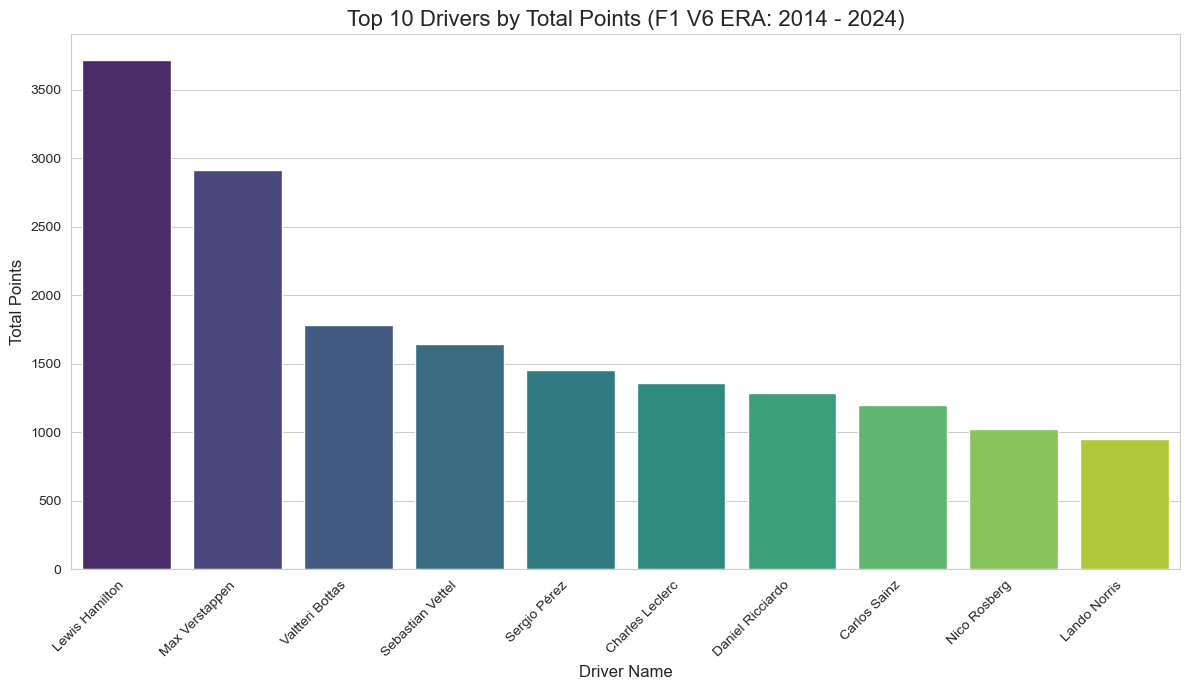

In [12]:
top_drivers_points = df_f1_v6.groupby("driverName")["points"].sum().nlargest(10)  # Top 10 drivers by total points

# Creating a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_drivers_points.index, y=top_drivers_points.values, hue=top_drivers_points.index, palette="viridis", legend=False)

plt.title("Top 10 Drivers by Total Points (F1 V6 ERA: 2014 - 2024)", fontsize=16)
plt.xlabel("Driver Name", fontsize=12)
plt.ylabel("Total Points", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotating labels for better readability
plt.tight_layout()  # This is to prevent labels from overlapping
plt.show()

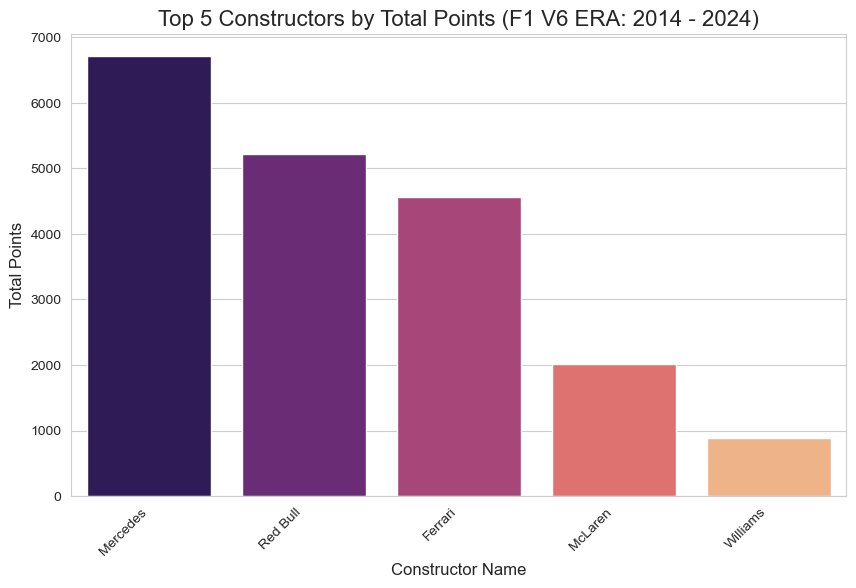

In [13]:
top_constructors_points = df_f1_v6.groupby("constructorName")["points"].sum().nlargest(5)  # Top constructors by total points

plt.figure(figsize=(10, 6))
sns.barplot(x=top_constructors_points.index, y=top_constructors_points.values, hue=top_constructors_points.index, palette="magma", legend=False)

plt.title("Top 5 Constructors by Total Points (F1 V6 ERA: 2014 - 2024)", fontsize=16)
plt.xlabel("Constructor Name", fontsize=12)
plt.ylabel("Total Points", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

## Finding 1: Dominant Drivers and Constructors defined the Era

The analysis shows that the F1 V6 era was characterized by periods of utter dominance from specific drivers and constructors. This is clearly visible in the total points scored throughout the period.

* **Mercedes' Dominance:** The data confirms that Mercedes secured the correct car specifications as specified by the FIA in the V6 era and utterly dominated this period. Their golden age, led by Lewis Hamilton and initially Nico Rosberg (later Valtteri Bottas), saw them win almost every race before 2022. Although the F1 car was close to perfect, one couldn't ignore Lewis' brilliant driving style where for instance he incorporated late breaking to overtake drivers and thus became a force to reckon with as evidenced by the points tally in the initial bar plots. Mercedes won 8 Constructors' championships in this period and Lewis Hamilton won 6 Drivers' championships driving for Mercedes (the other one he won at McLaren before joining Mercedes). 

* **Red Bull's Rise:** Mercedes' decline began in 2022 due to FIA's introduction of new aerodynamic regulations, particularly concerning their side pod design which was a "zero-sidepod" concept that failed to deliver. This created an opportunity for Red Bull, led by Max Verstappen, who has since asserted a period of utter dominance, winning almost every race since the regulation change. This Verstappen dominance would not be possible if it were also not for Adrian Newey who was the Chief Technical officer and had designed a rocket-ship of a car. Verstappen, being a super talented aggressive driver coupled up with Newey's design for Red Bull was just an unholy combination as Red Bull sweeped off almost every race and climbed the points' rank. In this period, Verstappen won 4 driver championships. Red Bull won 2 constructor championships (2022, 2023).

* **Ferrari's Position:** Ferrari, on the other hand, remained a top team with competitive drivers like Kimi Räikkönen, Sebastian Vettel, Charles Leclerc and Carlos Sainz Jr who consistently achieved podium finishes. While the team faced a major hit in 2019 following an investigation into their engine, they have since produced several podium finishes and remain a key competitor. Ferrari has not won a single championship, both constructors' and drivers' in the V6 era.

### Showing the relationship between the starting Grid position and the final position after the race

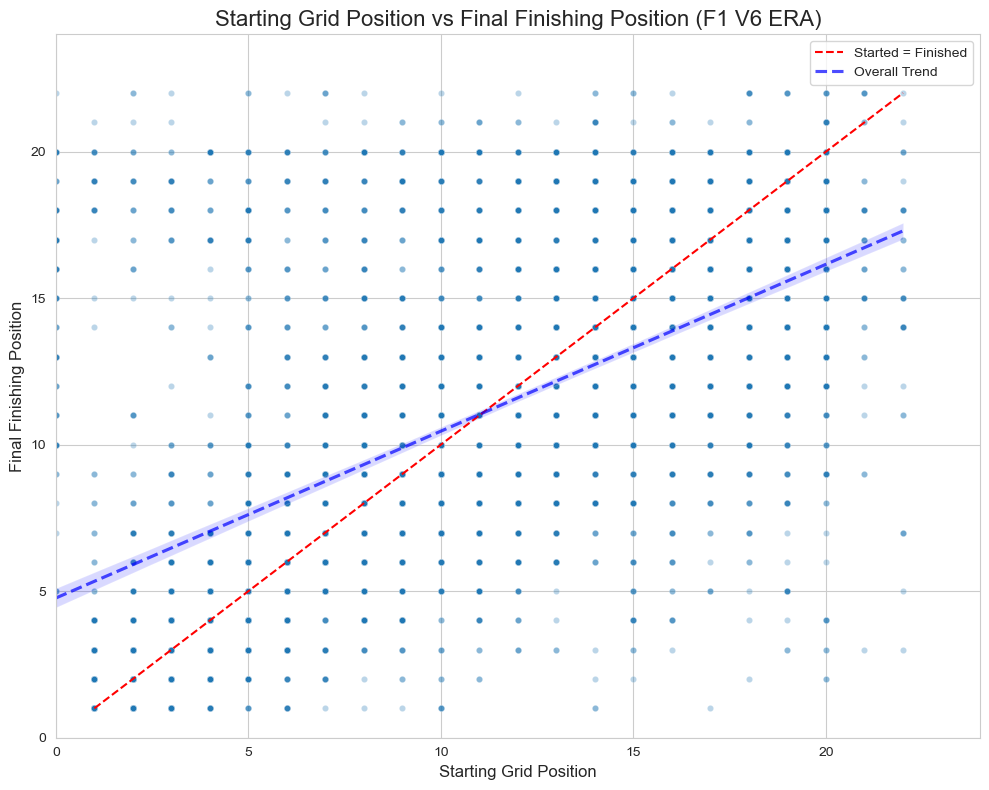

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="grid", y="positionOrder", data=df_f1_v6, alpha=0.3, s=20)  # alpha for transparency, s for size of points

# Adding a diagonal line for a perfect 1:1 correlation (grid = positionOrder)
# This represents a driver finishing in the exact position they started
max_pos = max(df_f1_v6["grid"].max(), df_f1_v6["positionOrder"].max())
plt.plot([1, max_pos], [1, max_pos], color="red", linestyle="--", label="Started = Finished")

# Adding a regression line to show the general trend
sns.regplot (x = "grid", y = "positionOrder", data = df_f1_v6, scatter = False, color = "blue", line_kws = {"linestyle": "--", "alpha": 0.7}, label = "Overall Trend")

plt.title("Starting Grid Position vs Final Finishing Position (F1 V6 ERA)", fontsize=16)
plt.xlabel("Starting Grid Position", fontsize=12)
plt.ylabel("Final Finishing Position", fontsize=12)
plt.xlim(0, df_f1_v6["grid"].max() + 2)  # Adjusting x-axis limit
plt.ylim(0, df_f1_v6["positionOrder"].max() + 2)  # Adjusting y-axis limit
plt.legend()
plt.tight_layout()
plt.show()         

#### Interpretations:
1. Each dot (data point) represents a race result.
2. The red line (x=y), indicates that data points which have fallen on it means the driver finished the race at the same position he began. (Started 10th, finished 10th).
3. The blue line is a regression line (line of best fit). It shows the general correlation between starting grid and position finished across all the data points.

#### Discussion (insights) from the scatter plot.
1. There is a strong correlation - The blue regression line shows that there is a strong positive correlation between the starting grid position and the final finishing position. Drivers who tend to start at the front tend to finish at higher positions and those who started at the back tend to finish at the back.
2. There is spread along the line - The dots are however not perfectly on the line as there is variability but we can deduce that the dots below the red line, represent instances where a driver gained positions during a particular race eg. started 10th on the grid and finished 5th. The dots that fall above the red line indicate that the drivers lost places during the race eg. started 5th on the grid and ended up 10th due to several factors such as just simply being outpaced, car reliability issues or track incidents.
3. Density - The bottom left part of the plot shows a dense cluster of points (darker). This indicates that most race results have drivers who start at the top of the grid finish at the top; in other words top F1 teams tend to maintain the top positions at the end of the particular grand prix.

### Showing the distribution of points scored per race

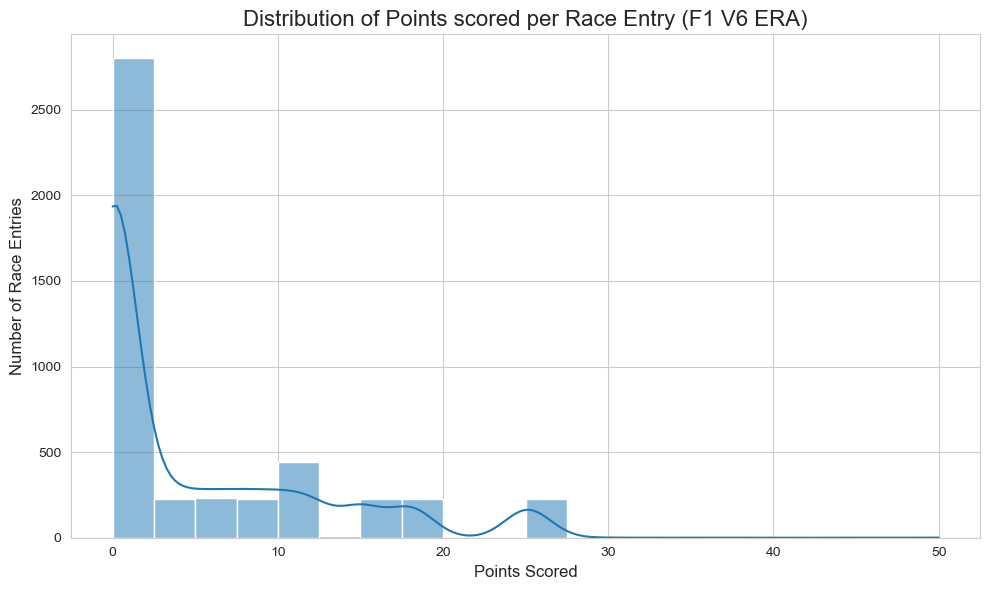

In [15]:
# A histogram will be used as there are many zero values under points
plt.figure(figsize=(10, 6))
sns.histplot(df_f1_v6["points"], bins=20, kde=True)  # bins to control number of bars, kde adds a density curve

plt.title("Distribution of Points scored per Race Entry (F1 V6 ERA)", fontsize=16)
plt.xlabel("Points Scored", fontsize=12)
plt.ylabel("Number of Race Entries", fontsize=12)
plt.tight_layout()
plt.show()

#### Interpretations/Discussions:
1. The maximum points scored in an F1 race is 25 points as shown in the x-axis. The y-axis shows how many times a specific range of points were scored.
2. The tallest bar is at zero. Varous reasons arise from this in F1 such as the drivers finishing outside the points scoring positions which is position 11 going downwards or the driver might have retired from the race due to various reasons. This also shows that most points are scored by the top finishers. Fewer drivers finish in higher positions than those who score zero or less points.
3. The smooth curve (KDE Line)overlays the histogram bars as it provides a generalized shape of the distribution. From this, we see that this is heavily right skewed distribution (positively skewed). It shows a steep peak at 0 then drops off. This shows that the majority of entries are concentrated at the lower end of the points scale as the long tail extends to the right where the few drivers score the most points.

#### Analyzing Race Statuses (DNFs and Finishes)

In [16]:
# Getting the counts of each unique statusId
status_counts = df_f1_v6["statusId"].value_counts()

print("\n--- Top 10 most common Race Status IDs ---")
print(status_counts.head(10))

# Finding out the percentage of results having '1' as statusId meaning 'Finished'
total_entries = len(df_f1_v6)
finished_count = status_counts.get(1, 0)  # Getting count for statusId 1 and defaulting to 0 if not found.
finished_percentage = (finished_count / total_entries) * 100

print(f"\n--- Percentage of race entries that were 'Finished' (statusId = 1): {finished_percentage:.2f}% ---")


--- Top 10 most common Race Status IDs ---
statusId
1      2403
11     1178
12      208
4       150
3        85
5        81
130      59
31       50
23       49
6        42
Name: count, dtype: int64

--- Percentage of race entries that were 'Finished' (statusId = 1): 51.95% ---


### Visualizing the above Race Statuses
#### Initial DNF status

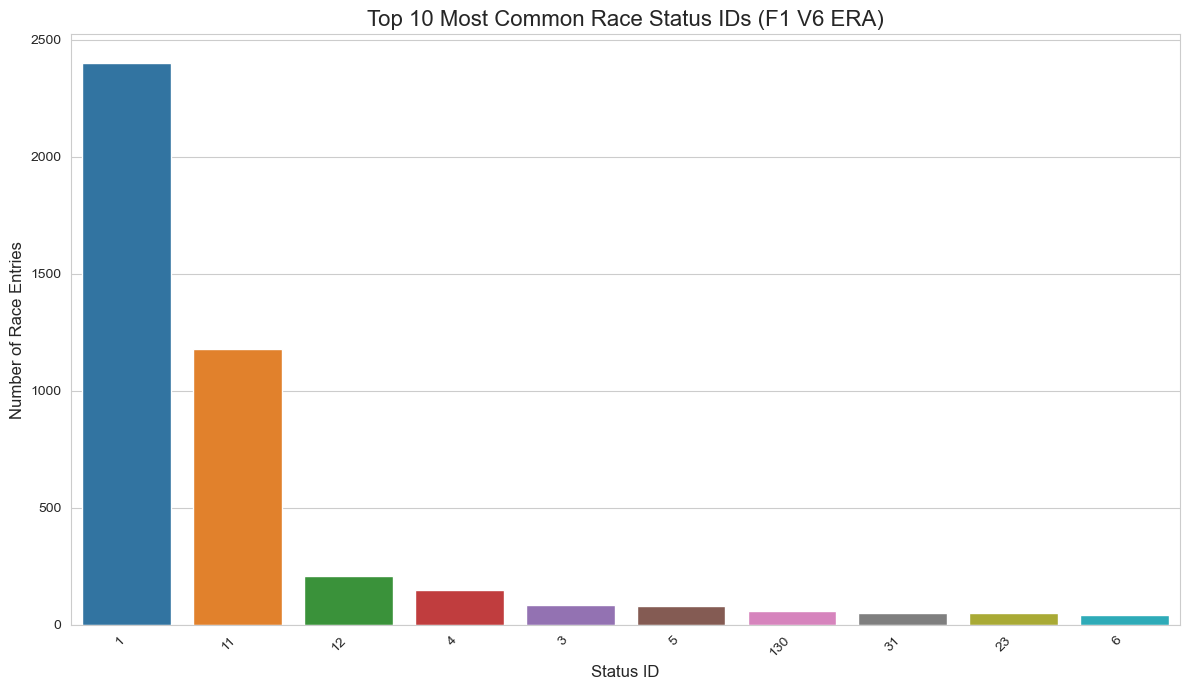

In [17]:
top_10_status = status_counts.head(10)

plt.figure (figsize = (12, 7))
sns.barplot (x = top_10_status.index.astype(str), y = top_10_status.values, hue = top_10_status.index.astype(str), palette = "tab10", legend = False)

plt.title ("Top 10 Most Common Race Status IDs (F1 V6 ERA)", fontsize = 16)
plt.xlabel ("Status ID", fontsize = 12)
plt.ylabel ("Number of Race Entries", fontsize = 12)
plt.xticks (rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

On the x-axis of this plot, it is evident that the raw `statusId` values, while informative in showing the frequency of different race outcomes, are not immediately meaningful on their own. The value `1` is clearly the most dominant, representing a finished race, while other numerical IDs require further data processing to be fully understood. This initial visualization highlights the need to map these raw IDs to their corresponding text descriptions to properly analyze the reasons behind race retirements (DNFs) in a way that is imore interpretable. This is done below by omitting `statusId = 1` and focusing on what causes drivers not to finish a race, commonly referred to as DNF (Did Not Finish).

### Analyzing reasons for DNF (Did Not Finish)

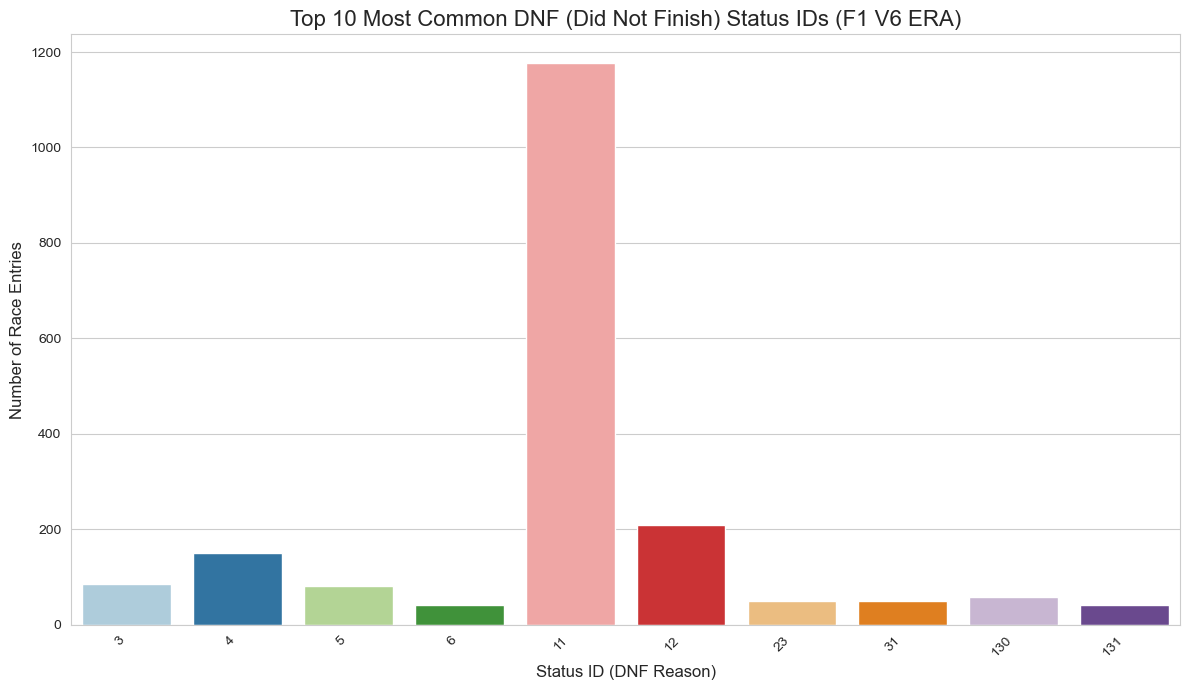

In [18]:
# Filtering for race entries where statusId is NOT '1' (which is 'Finished')
dnf_entries = df_f1_v6[df_f1_v6["statusId"] != 1]

# Getting the count of each DNF statusId
dnf_counts = dnf_entries["statusId"].value_counts().head(10).reset_index()
dnf_counts.columns = ["statusId", "count"]  # Renaming columns for clarity

plt.figure(figsize=(12, 7))
sns.barplot(x="statusId", y="count", data=dnf_counts, hue="statusId", palette="Paired", legend=False)  # Using a new palette

plt.title("Top 10 Most Common DNF (Did Not Finish) Status IDs (F1 V6 ERA)", fontsize=16)
plt.xlabel("Status ID (DNF Reason)", fontsize=12)
plt.ylabel("Number of Race Entries", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Interpretations/Discussions
1. Status 11 which is the highest indicate (as generally used) that these are engine or Power Unit Failures. This is one of the major problems affecting the 1.6ltr V6 turbo-hybrid era. The new power units tend to have reliability problems.
2. Status 12 generally indicate collisions on the track. These are general racing incidents which is an inherent part of the sport.
3. Status 4 generally indicate a suspension problem that caused the DNF

Further discussions on **Analyzing the Trend of Reliability** which is in relation to DNFs is discussed on the `DNF Rate race per year line plot` in the subsequent visualizations.

### Distribution of Laps completed per Race Entry

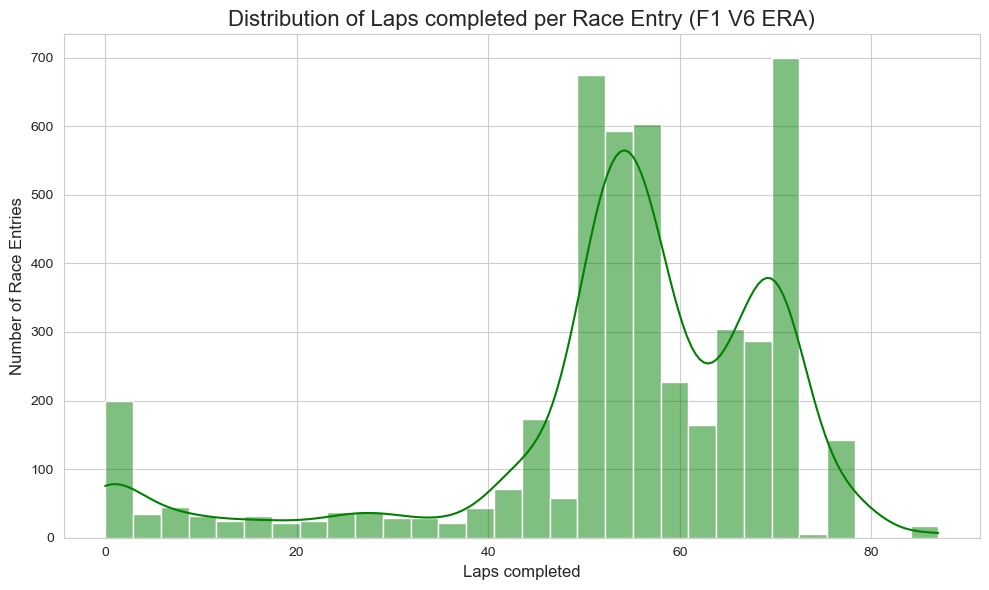

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_f1_v6["laps"], bins=30, kde=True, color="green")  # More bins = wider range of laps

plt.title("Distribution of Laps completed per Race Entry (F1 V6 ERA)", fontsize=16)
plt.xlabel("Laps completed", fontsize=12)
plt.ylabel("Number of Race Entries", fontsize=12)
plt.tight_layout()
plt.show()

#### Discussions/Interpretations:
1. It is evident that the tall clusters are dorminant towards the end of the x-axis. This shows that a majority of drivers successfuly finish a race as this the desired outcome for both driver and constructor. Where the bars peak is typically the total number of laps in a particular race.
2. The left part of the x-axis shows a small peak close to 0 laps. This shows that some drivers tend to finish a small number of laps before retiring as some do not even get a chance of making a full first lap. During the first lap, there are significant  numbers of incidents of collisions due to drivers trying to complete an overtake after the "lights out" signal. Other factors that may contribute to this is engine failure, or disqualifications.
3. This distribution might possess a multi-modal characteristic as  the KDE line shows multiple distinct peaks. This shows that there are other retirements that happen mid-race due to earlier mentioned factors such as collisions, disqualifications, engine failure etc. We can also see the tail of the KDE line is longer to the left (as expected) suggesting that it is negatively skewed.

### Performance Trend over seasons during the V6 Era
### Total points scored per season 

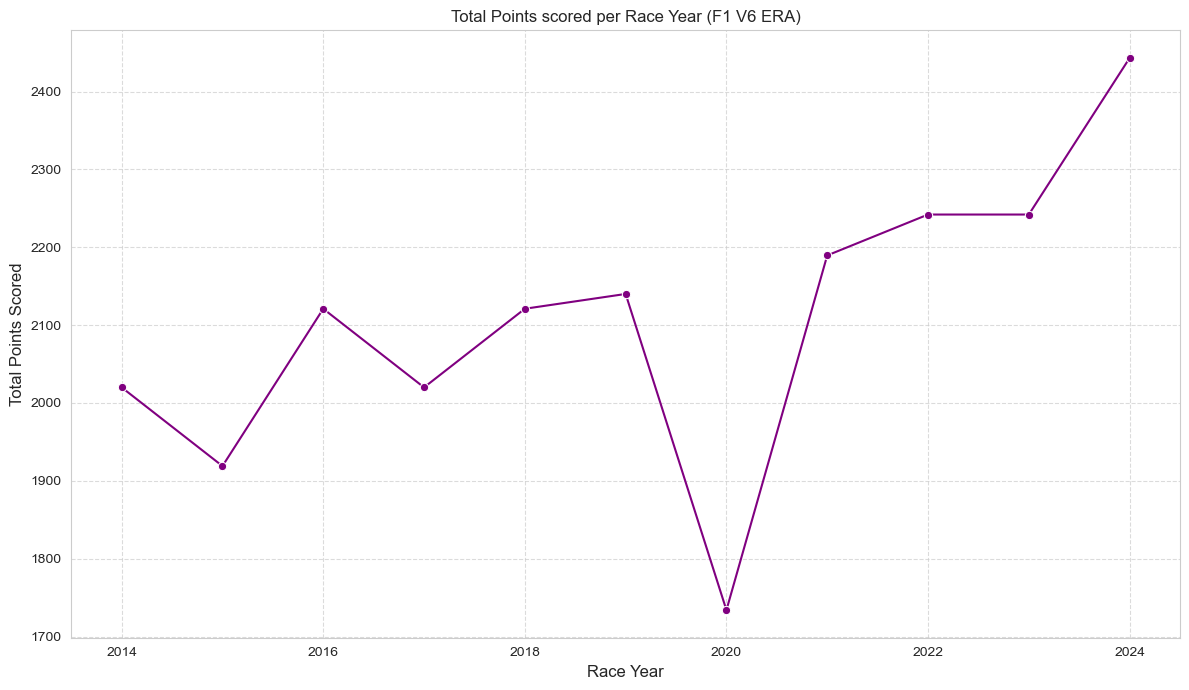

In [20]:
# Grouping by season and summing the points
points_per_season = df_f1_v6.groupby("raceYear")["points"].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x="raceYear", y="points", data=points_per_season, marker="o", color="purple")  # adding points to the line (marker)

plt.title("Total Points scored per Race Year (F1 V6 ERA)", fontsize=12)
plt.xlabel("Race Year", fontsize=12)
plt.ylabel("Total Points Scored", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)  # grid is added for easier reading of values
plt.tight_layout()
plt.show()

#### Discussions/Interpretations:
1. The line plot shows a fluctuating but generally steady increase in points scored per Race Year. There is a significant dip in 2020 due to the Covid-19 pandemic whereby several races were postponed as others were ultimately cancelled. This led to a significant shorter calendar/race season.
2. After 2020, there was a significant increase of points scored as shown as 2024 boasted the highest points tally. Reasons that have led to this are such as an introduction of sprint races. Sprint races were introduced in 2021 which replaced one of the free practice sessions. Points are scored on the sprint races and by obvious circumstances, led to an increase of total points scored. Another thing that may have led to this is the reliability of cars may have improved leading to more finishes or even addition of races. 2021 saw the addition of races to be 22 (the highest at the time) which has increased to 24 in 2024 thus more points being generated.
3. Post 2020 we see that Formula 1 returned to full capacity as explained above showing that there is higher competition amongst drivers and constructors leading to more overall points being scored.

### Correlation Analysis

--- Correlation Matrix ---
                 resultId    raceId  driverId  constructorId  raceYear  \
resultId         1.000000  0.999444  0.266879       0.181522  0.995608   
raceId           0.999444  1.000000  0.266116       0.179849  0.995658   
driverId         0.266879  0.266116  1.000000      -0.050030  0.267561   
constructorId    0.181522  0.179849 -0.050030       1.000000  0.183380   
raceYear         0.995608  0.995658  0.267561       0.183380  1.000000   
round            0.193603  0.188995  0.022761       0.010309  0.102663   
grid            -0.063248 -0.065751  0.190801       0.124795 -0.066125   
positionOrder   -0.029876 -0.034069  0.174486       0.130697 -0.034131   
points           0.006233  0.009631 -0.221382      -0.108978  0.009382   
laps             0.060595  0.062520 -0.017842      -0.009710  0.062980   
milliseconds    -0.089506 -0.088617 -0.008334      -0.008465 -0.094664   
fastestLap       0.067232  0.067888 -0.005974       0.002285  0.067511   
fastestLapS

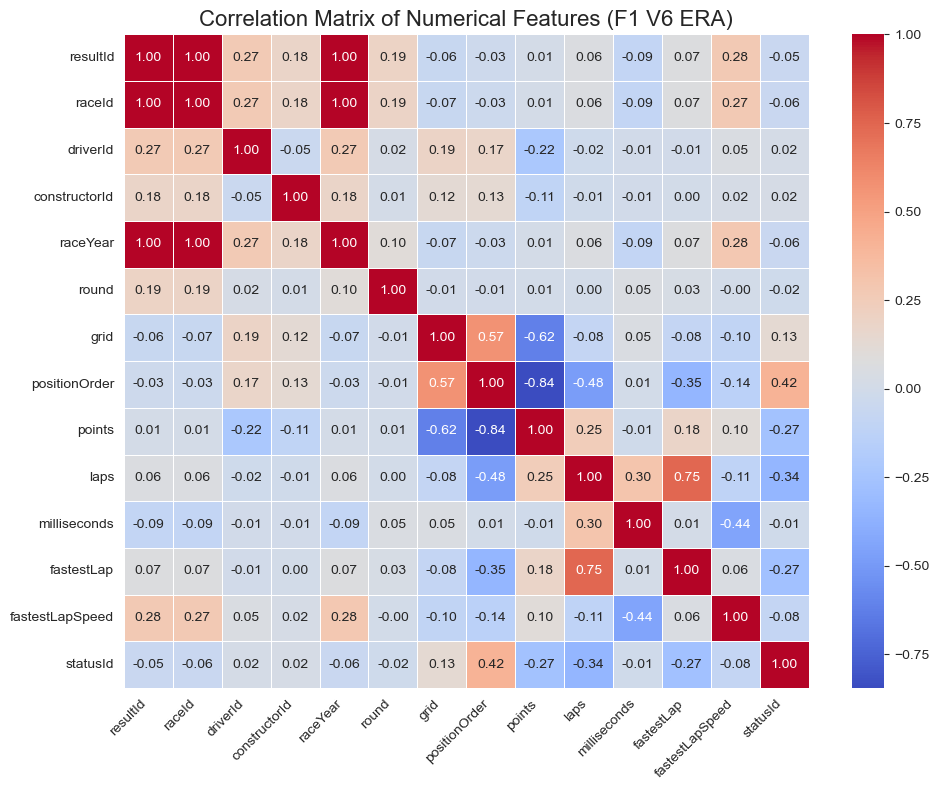

In [21]:
# Selecting numerical columns for correlation calculation
numerical_df = df_f1_v6.select_dtypes(include=["number"])

# Calculating correlation matrix
correlation_matrix = numerical_df.corr()

print("--- Correlation Matrix ---")
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numerical Features (F1 V6 ERA)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Interpretations/Discussions:
1. Perfect positive linear correlation is indicated by +1 (Dark Red). As one variable increases, the other variable increases proportionally. Perfect negative linear correlation is indicated by -1 (Dark Blue). As one variable increases, the other variable decreases proportionally. No linear correlation is indicated by 0 (light/white).
2. The diagonal of the heatmap is 1 because a variable is always perfectly correlated with itself.
#### Discussions:
1. We can see a **sufficiently high degree of negative correlation (-0.84)** between `points` and `positionOrder`. This is expected and makes sense in the F1 context as the lower the position (eg. 1st, 2nd, 3rd...) the more the points scored (25pts, 18pts, 15pts...). This is the strongest negative correlation in the heatmap.
2. There is a **sufficiently moderate degree of positive correlation (0.57)** between `grid` and `positionOrder`. This is somewhat expected (as also evidenced by the scatterplot above) in that the starting grid position influences the final race position.If a driver starts at a really high position such as 15th, there is a high chance that he finishes the race at 15th (+ or - possibly one or two positions).
3. Under `points` and `grid`, there is a **moderate degree of negative correlation (-0.62)**. This is also expected as the starting grid position becomes higher and higher (11th, 12th...) the chances of scoring points in that race tend to reduce. No points are actually awarded on the 11th position onwards. This moderate correlation is backed up by the grid vs positionOrder discussed above.
4. We can see a **sufficient moderate degree of negative correlation (-0.48)** between `laps` and `positionOrder`. The higher the laps done (towards finishing the race), the higher the chance of finishing the race at a "lower" position. Failure to finish the race (DNFs) result to higher (double digit) finishing positions.
5. Under `laps` and `fastestLap`, there is a **sufficiently high degree of positive correlation (0.75)**. The more laps a driver completes, the higher the chance their fastestLap (the lap number on which their fastest time was set) will be later in the race, or even the better the chance of setting the fastestLap after going for many laps.
6. There is a **sufficient moderate degree of negative correlation (-0.44)** between `fastestLapSpeed` and `milliseconds`. The higher the fastestLapSpeed, the lower the milliseconds. This makes sense in the racing context in that the more the speed the less time the distance is covered.
7. The `raceYear` and `points` have **possibly no correlation (0.01)** as a specific year/season has no significance with the points being scored albeit an external factor like the Covid-19 pandemic which affected the 2020 season entirely. Other than that there are no influences between the two.
8. The `resultId`, `raceYear` and `raceId` have a **perfectly positive correlation (1.00)** because they increase chronologically each and every year/season. These are merely identifiers and have no direct influence to the performances.

## Analyzing the Trend of Reliability
Investigating whether car reliability has improved over the years under the V6 Era. The DNF Rate will be the percebtage of Race Entries in a given year that did not result in a 'Finished' status (`statusId = 1`). A decreasing DNF will inform us that the cars have improved over time and an increase in DNFs will tell us it's getting worse and worse over time.

#### DNF Rate per Year

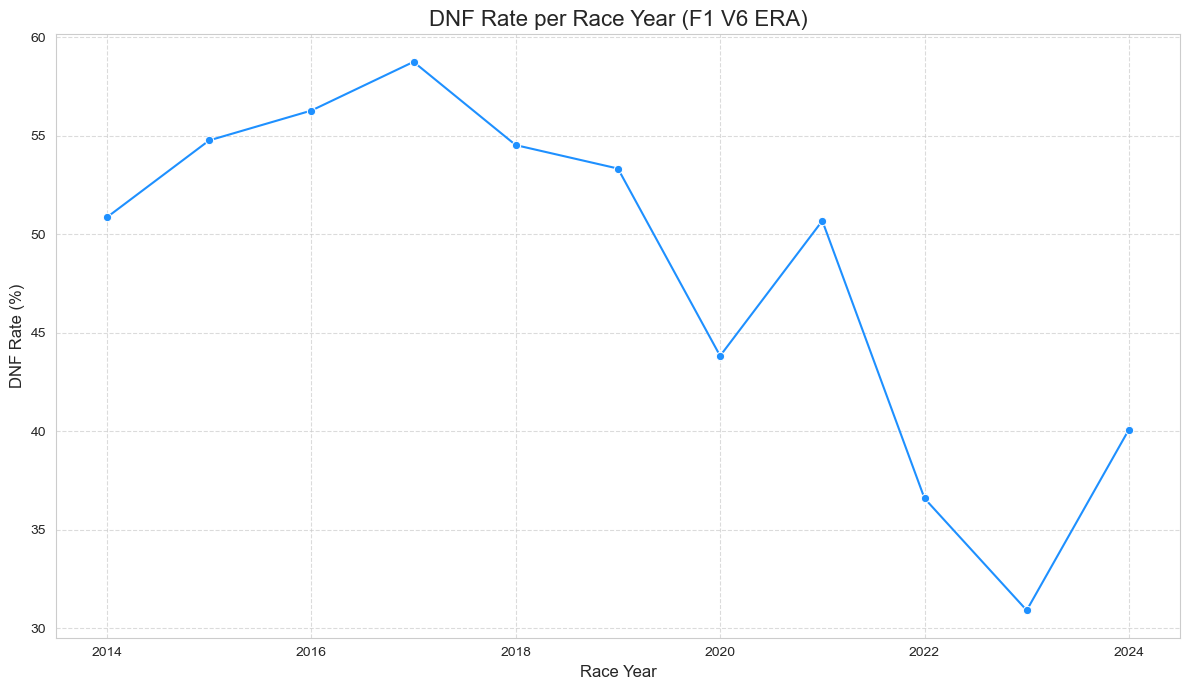

In [22]:
# Creating a df to hold the reliability data
reliability_df = df_f1_v6.groupby("raceYear").size().reset_index(name="total_entries")

# Counting the number of DNFs excluding statusId = 1
dnf_counts_yearly = df_f1_v6[df_f1_v6["statusId"] != 1].groupby("raceYear").size().reset_index(name="dnf_count")

# Merging the two dfs on 'raceYear'
reliability_df = reliability_df.merge(dnf_counts_yearly, on="raceYear", how="left")

# Filling any NaN values with 0
reliability_df["dnf_count"] = reliability_df["dnf_count"].fillna(0)

# Calculating the DNF rate percentage
reliability_df["dnf_rate"] = (reliability_df["dnf_count"] / reliability_df["total_entries"]) * 100

# Plotting the DNF rate over time
plt.figure(figsize=(12, 7))
sns.lineplot(x="raceYear", y="dnf_rate", data=reliability_df, marker="o", color="dodgerblue")

plt.title("DNF Rate per Race Year (F1 V6 ERA)", fontsize=16)
plt.xlabel("Race Year", fontsize=12)
plt.ylabel("DNF Rate (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Findings from the DNF Rate Line Plot

1. **Initial Unreliability (2014 - 2017):**
    * The line plot shows that unreliability issues steadily increased from 2014 to 2017. As mentioned earlier, this was due to the early years of the V6 era, where most F1 teams struggled to construct the complex V6 engines.
    * The initial limitations of strict FIA regulations regarding the number of engine parts contributed to these reliability problems, as teams were forced to push their engines to the limit with limited resources.

2. **Significant Improvement (2018 - 2023):**
    * As the subsequent years followed, from 2018 to 2023, the DNF trend dropped significantly. This was a result of the FIA relaxing the rules regarding engine parts.
    * These changes led to DNFs hitting an all-time low of less than 33% in 2023, which represents a major improvement in car reliability.

3. **Overall Trend:**
    * The line plot shows a clear general downward trend in reliability issues over the entire period. While the initial stages of the V6 era were quite rocky and unstable, the cars became more dependable as the years progressed.

# Comprehensive findings of the F1 V6 Turbo Hybrid Era (2014-2024)

This data analysis project explored the F1 V6 Turbo Hybrid era (2014-2024), a decade characterized by significant technological advancements and intense competition. By examining key metrics like points, race outcomes, and reliability, this project can now tell the story of this decade of Formula 1.

## Finding 1: Dominant Drivers and Constructors defined the Era

The analysis shows that the F1 V6 era was characterized by periods of utter dominance from specific drivers and constructors. This is clearly visible in the total points scored throughout the period.

* **Mercedes' Dominance:** The data confirms that Mercedes secured the correct car specifications as specified by the FIA in the V6 era and utterly dominated this period. Their golden age, led by Lewis Hamilton and initially Nico Rosberg (later Valtteri Bottas), saw them win almost every race before 2022. Although the F1 car was close to perfect, one couldn't ignore Lewis' brilliant driving style where for instance he incorporated late breaking to overtake drivers and thus became a force to reckon with as evidenced by the points tally in the initial bar plots. In the initial years of the V6 era, the pairing of Lewis Hamilton and Nico Rosberg was something to be admired. Both teammates had an intense rivalry that made them push each other to their limits and this greatly impacted Mercedes overrall. Rosberg ended up winning the Drivers' Championship in 2016, the first in the V6 era not being Hamilton. He retired from Formula One that same year and as evidenced by the `Top 10 Drivers by Total Points (F1 V6 ERA: 2014 - 2024) bar plot`, he still ranks top 10, despite retiring so many seasons ago. During this Hamilton's masterclass period, we cannot fail to mention Valtteri Bottas who was the ultimate team player. He fostered a good environment within the team and worked well with Hamilton. He offered the supporting role to Hamilton despite him also challenging for wins and some podiums. Mercedes won 8 Constructors' championships in this period and Lewis Hamilton won 6 Drivers' Championships driving for Mercedes (the other one he won at McLaren before joining Mercedes).

* **Red Bull's Rise:** Mercedes' decline began in 2022 due to FIA's introduction of the new aerodynamic regulations, particularly concerning their side pod design which was a "zero-sidepod" concept that failed to deliver. This created an opportunity for Red Bull, led by Max Verstappen, who has since asserted a period of utter dominance, winning almost every race since the regulation change. This Verstappen dominance would not be possible if it were also not for Adrian Newey who was the Chief Technical officer and had designed a rocket-ship of a car and almost ticked every box as per the FIA regulations. Verstappen, being a super talented aggressive driver coupled up with Newey's design for Red Bull was just an unholy combination as Red Bull sweeped off almost every race and climbed the points' rank. In this period, Verstappen won 4 driver championships. Red Bull won 2 constructor championships (2022, 2023). Red Bull's dominance would not also be possible without Sergio Pérez. Pérez supported Max into winning his first Drivers' Championships due to his brilliant driving skills. Not only this, he aided Red Bull's dominance period grabbing several podium finishes and race wins. Pérez was also notable for his defensive driving which earned him the name "Mexican Minister of Defence" as he was interestingly able to make the car 'wide' preventing overtakes. His mastery in the street races was always notable especially in Baku and Singapore as he was always able to nurse his tyres preventing faster tyre degradation and going for longer stints before a strategic pitstop. If it were not for inconsistensies in the 2024 season, he would have been higher up in the `Top 10 Drivers by Total Points (F1 V6 ERA: 2014 - 2024) bar plot` as Red Bull would have had an extra constructors' championship.  

* **Ferrari's Position:** Ferrari, on the other hand, remained a top team with competitive drivers like Kimi Räikkönen, Sebastian Vettel, Charles Leclerc and Carlos Sainz Jr who consistently achieved podium finishes. While the team faced a major hit in 2019 following an investigation into their engine whereby they had an insane straight-line speed, they failed to win a single race in the 2020 season. Ferrari has since produced several podium finishes and remain a key competitorFerrari has not won a single championship, both constructors' and drivers' in the V6 era. Despite the Scuderia Ferrari having the most constructors' championship in Formula One and being utterly dominant in the naturally aspirated V10 and V8 engines era , the team has been in decline in this V6 era, struggling to match the pace of Mercedes and Red Bull. Not only have they failed to capitalize on the recent FIA regulations as compared to Mercedes and Red Bull, Ferrari has had a not so good history in managing their races in the sense that their strategies on track tend to mess up their races. Were it not for the setbacks, Ferrari has always been a legendary team and considered the most successful team although outside the V6 era.

## Finding 2: Starting Grid Position is a good predictor of a Race Outcome

Our analysis shows a clear and good relationship between a driver's starting position on the grid and their final race result.

* **Grid Position, Overtakes, and Points:** The data suggests that starting at a lesser position (1st, 2nd, 3rd, etc.) gives a driver a better chance to finish the race in a better position. This is because the number of overtakes are minimal at the front of the grid, where there is less "dirty air" from other cars, ultimately improving a driver's chances of scoring points. The correlation matrix also provides us with insights regarding the `grid` vs `positionOrder`, whereby a sufficiently moderate degree of positive correlation (**0.57**) exists. This suggests that it has become considerably difficult to overtake during a race, a phenomenon exacerbated by the increase in car size due to new FIA regulations, especially since 2017. For better chances of a successful race, a good qualifying position (grid) is paramount. This is particularly true for street circuits like the Monaco Grand Prix, where the narrow track limits a driver's ability to execute a proper overtake.
  
* **F1 Ranking system:** In Formula One, points are always awarded to the top 10 finishers. The ranking sysyem is as follows:
    - 1st: 25 points
    - 2nd: 18 points
    - 3rd: 15 points
    - 4th: 12 points
    - 5th: 10 points
    - 6th: 8 points
    - 7th: 6 points
    - 8th: 4 points
    - 9th: 2 points
    - 10th: 1 point
    - Fastest Lap (if in top 10): 1 point

    This shows that a lesser `positionOrder` (1st, 2nd, 3rd...) results to more points being scored. This is evidenced by the strongest correlation in our data, a sufficiently high degree of negative correlation of **-0.84** between `points` and `positionOrder`.

## Finding 3: Reliability and Collisions Defined the DNF Landscape

This analysis of race retirements shows a clear landscape of failures, with a strong emphasis on mechanical unreliability in the initial years of the era.

* **Increased Complexity:** The V6 hybrid engines, introduced in 2014, are significantly more complex than the V8 and V10 engines they replaced. They incorporate turbochargers, energy recovery systems (ERS), and other hybrid components, making them more prone to failure, especially in the initial years of the new regulations.

* **Early Reliability Issues:** The introduction of the V6 hybrid engines in 2014 was plagued by reliability problems. Many teams struggled to complete even a handful of laps during testing, and some teams, like Renault, faced significant issues throughout the season.

* **Stricter Regulations:** While the regulations were initially strict regarding the number of engine parts teams could use, they were relaxed over time. The initial limitations contributed to reliability problems, as teams were forced to push their engines to the limit with limited resources.

* **Collisions:** Following engine failures, collisions were the second most common DNF reason. This highlights the inherent competitive and high-risk nature of the sport, where on-track incidents are a frequent cause of a driver's retirement from a race.

### Pre-treatment for Machine Learning

This report concludes the Exploratory Data Analysis phase of the project. To prepare the data for future predictive modeling, the project performed key pre-treatment steps. This involved selecting specific features (e.g. `grid`, `constructorId`, `raceYear`), encoding categorical variables to a numerical format, and splitting the data into distinct training and testing sets. The following code block demonstrates this pre-treatment process.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Defining our features X and our target y
# The features shall be 'grid', 'constructorName' and 'raceYear' as features predict 'positionOrder'
features = ["grid", "constructorName", "raceYear"]
target = "positionOrder"

X = df_f1_v6 [features]
y = df_f1_v6 [target]

# Identifying categorical featurers
categorical_featurers = ["constructorName"]

# Inotializing the OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fitting and transforming the categorical data
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_featurers]), columns=encoder.get_feature_names_out(categorical_featurers))

# Dropping the original categorical column from X and concatenating the new encoded columns
X = X.drop(columns=categorical_featurers).reset_index(drop=True)
X = pd.concat([X, X_encoded], axis=1)

# Splitting the data unto training and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of the pre-treated featurers (X_train):")
print(X_train.head())

Shape of X_train: (3700, 22)
Shape of X_test: (926, 22)
Shape of y_train: (3700,)
Shape of y_test: (926,)

First 5 rows of the pre-treated featurers (X_train):
      grid  raceYear  constructorName_Alfa Romeo  constructorName_AlphaTauri  \
881     12      2016                         0.0                         0.0   
4512     9      2024                         0.0                         0.0   
3485    17      2022                         0.0                         0.0   
2216     9      2019                         0.0                         0.0   
3349     2      2022                         0.0                         0.0   

      constructorName_Alpine F1 Team  constructorName_Aston Martin  \
881                              0.0                           0.0   
4512                             0.0                           0.0   
3485                             0.0                           0.0   
2216                             0.0                           0.0   
3349     

### Predictive Data Analytics

Following the pre-treatment of our data, this project proceeds to build a machine learning model to predict a driver's final race position (`positionOrder`). This task is a regression problem and begins by using a **Random Forest Regressor** model, a robust algorithm known for its accuracy. The model will be trained on the `X_train` and `y_train` datasets and then used to make predictions on the unseen `X_test` data.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor Model, the n_estimators are the no. of trees in the forest as the random_state ensures reproducible results
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model using the training data
# The X_train contains the features (grid, encoded constructor, raceYear) as the y_train contains the target which is the positionOrder
print("Starting model training...")
model.fit(X_train, y_train)
print("Model training complete.")

# Making predictions on the unseen test data (X_test) as the model uses what it learned from X_train/y_train to predict y_test
y_pred = model.predict(X_test)
print("Making predictions on test data...")
print("Predictions complete.")

# Displaying the first few actual vs predicted values
results_df = pd.DataFrame({"Actual_Position": y_test, "Predicted_Position": y_pred})
print("\nFirst 10 Actual vs Predicted Positions:")
print(results_df.head(10))

Starting model training...
Model training complete.
Making predictions on test data...
Predictions complete.

First 10 Actual vs Predicted Positions:
      Actual_Position  Predicted_Position
3309                3            4.218375
1034                8           12.609701
2329                3            2.341835
2677               11           15.451286
33                 12            8.473901
1261               15           14.901167
2372                6            5.791332
1421               15           15.307249
642                18           12.720480
179                 4            3.935262


The model was successfully trained on the pre-processed data. The output displays a direct comparison between the actual positions and the positions predicted by the model for the first 10 entries in the test set. The predictions, while not perfect, appear to be in a reasonable range, indicating that the model has captured some of the underlying patterns in the data. The next step is to formally evaluate the model's overall performance using a wider range of metrics.

### Evaluating the Model's Performance

With the model trained and predictions made, the project now formally evaluates its performance. The project proceeds to calculate two key metrics: the **Mean Absolute Error (MAE)**, which provides the average prediction error in terms of race positions and the **R-squared ($R^2$) Score**, which expresses the proportion of variance in the target variable that is predictable from the features. R-squared which is also referred to as the Goodness of fit, is the ratio of the explained variance to the total variance.

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Rounding the predictopns to the nearest whole number for better interpretation
y_pred_rounded = np.round(y_pred)

# Calculating the MeanAbsoluteError (MAE)
mae = mean_absolute_error(y_test, y_pred_rounded)

# Calculating the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 3.68
R-squared (R2) Score: 0.33


The predictive model was able to successfully train and generate predictions on the unseen test data. The model's performance was evaluated using two key metrics:

* **Mean Absolute Error (MAE):** A value of 3.68 indicates that, on average, the model's predicted finishing position was approximately 3 to 4 places away from the actual result.
* **R-squared ($R^2$) Score:** The score of 0.33 suggests that the selected features (`grid`, `constructorName`, `raceYear`) can explain roughly 33% of the variation in the final race positions as the remaining 67% can be explained by other possibly unquantifiable factors like for instance weather, tyre strategy and on and off track incidents.

While this predictive ability is modest, it confirms a significant relationship between a driver's starting grid position and the final outcome, a finding that supports the earlier done exploratory data analysis. The model's performance is limited by the absence of other critical factors such as race strategy, tyre choice, penalties and external events, which significantly influence race results.

### Conclusion

This project successfully addressed the central question of what key factors and trends defined the Formula 1 V6 Turbo Hybrid era. Through a comprehensive data analysis of race outcomes from 2014 to 2024, the project successfully fulfilled its objectives by uncovering significant trends in both driver/constructor performance and race dynamics.

The exploratory data analysis confirmed that the era was defined by periods of sustained dominance. Mercedes, led by the seven time World Champion **Lewis Hamilton** and supported by the intense rivalry with Nico Rosberg, established a period of unparalleled success. This made them to secure 8 Constructors' Championships. The analysis further highlighted the shift in power to Red Bull, whose rise was driven by **Max Verstappen's** aggressive driving style and Adrian Newey’s innovative car designs. This combination lead to a new period of pure dominance. The analysis of race outcomes, particularly DNFs, revealed that while initial years saw challenges with the complex V6 turbo-hybrid engines, reliability significantly improved over the decade due to relaxed regulations and advancing technology. The data on points scored showed a general upward trend, with a significant dip in 2020 due to the shortened season and a subsequent increase partly due to the introduction of sprint races.

A key finding from the analysis was the strong relationship between a driver's starting grid position and their final finishing order. The scatter plot and the correlation matrix both demonstrated a **sufficiently moderate positive correlation (0.57)** between `grid` and `positionOrder`. This confirmed that starting at the front significantly increases the likelihood of a strong result. This insight was further explored and validated by the predictive data analytics phase. The Random Forest Regressor model, using `grid`, `constructorName`, and `raceYear` as features, achieved a **Mean Absolute Error (MAE) of 3.68** and an **R-squared ($R^2$) score of 0.33**.

While the model's predictive ability was modest, explaining approximately one-third of the variance in race outcomes, this is a significant finding. It demonstrates that a substantial portion of a driver's final position is determined by their qualofying performance and their team's competitiveness. The model's limitations also underscored that a complete picture of a race outcome would require incorporating other unquantifiable factors. These are factors such as in-race strategy, tyre choice, tyre degradation and other external events.

In conclusion, this project provides a data-driven narrative of the F1 V6 Turbo Hybrid era. It demonstrates that while dominance and grid position are powerful indicators of success, the unpredictable nature of the sport and the technological challenges of the era’s power units continue to shape the outcome on the track. This analysis serves as a foundation for understanding the dynamics of modern Formula 1 and highlights areas for further and more granular investigation.

---